In [8]:
%load_ext autoreload
%autoreload 2
import numpy as np
# import azul.tictactoe as logic 
import azul.logic as logic
import azul.ai as ai
from random import choice 

# state = {'factory': [[], [], [], [], [], [], []], 'center': [], 'player': [{'grid': [[1, 2, 3, 4, 5], [0, 0, 2, 3, 4], [4, 0, 1, 2, 3], [3, 0, 5, 0, 0], [0, 0, 4, 0, 0]], 'line': [[], [5], [], [1, 1], []], 'score': 43, 'floor': []}, {'grid': [[1, 2, 3, 4, 5], [5, 1, 2, 3, 0], [4, 5, 1, 2, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0]], 'line': [[], [], [], [4], [4, 4, 4, 4]], 'score': 41, 'floor': []}, {'grid': [[1, 2, 3, 4, 0], [5, 1, 2, 3, 4], [0, 0, 0, 2, 3], [0, 0, 0, 0, 2], [0, 0, 0, 0, 0]], 'line': [[], [], [1, 1], [1, 1, 1], [1, 1, 1, 1]], 'score': 21, 'floor': []}], 'activePlayer': 2, 'roundIdx': 5}

state = logic.reset_round(2)
root = ai.MCTS_node(state)

root.grow_while(10)
action, idx = root.get_best_action()
root.child[idx].numRolls, root.child[idx].numWins

(169, 99.5)

In [14]:
state = logic.reset_round(numPlayers=2)
root = ai.MCTS_node(state)

root.grow_while(10)
action, idx = root.get_best_action()
root.child[idx].numWins, root.child[idx].numRolls  # 13, 15, 15

(8.75, 15)

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import azul.logic_wrapper as logic
import azul.ai_wrapper as ai

# state = {'factory': [[], [], [], [], [], [], []], 'center': [], 'player': [{'grid': [[1, 2, 3, 4, 5], [0, 0, 2, 3, 4], [4, 0, 1, 2, 3], [3, 0, 5, 0, 0], [0, 0, 4, 0, 0]], 'line': [[], [5], [], [1, 1], []], 'score': 43, 'floor': []}, {'grid': [[1, 2, 3, 4, 5], [5, 1, 2, 3, 0], [4, 5, 1, 2, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0]], 'line': [[], [], [], [4], [4, 4, 4, 4]], 'score': 41, 'floor': []}, {'grid': [[1, 2, 3, 4, 0], [5, 1, 2, 3, 4], [0, 0, 0, 2, 3], [0, 0, 0, 0, 2], [0, 0, 0, 0, 0]], 'line': [[], [], [1, 1], [1, 1, 1], [1, 1, 1, 1]], 'score': 21, 'floor': []}], 'activePlayer': 2, 'roundIdx': 5}

# state = logic.reset_round(2)
state = logic.Table()
root = ai.MCTS_node(state)
root.grow_while(1)
# action, idx = root.get_best_action()
# root.child[idx].numRolls, root.child[idx].numWins

ModuleNotFoundError: No module named 'logic_wrapper'

In [5]:
root.get_best_action(), root.numRolls

(((5, 5, 0), 40), 855)

In [6]:
import azul.logic as logic_old
import azul.ai as ai_old

root2 = ai_old.MCTS_node(state.get_observation())

root2.grow_while(10)
root2.get_best_action(), root2.numRolls

(([5, 5, 3], 117), 882)

(([2, 2, 3], 45), 866)

In [1]:
import pythonnet
# print(get_runtime_info())  # should be dotnet
pythonnet.load("coreclr")  # to use dotnet rather than mono

import clr
import sys
sys.path.append(r"AzulLibrary/bin/Debug/net6.0")

clr.AddReference('AzulLibrary') #add .dll file
from Azul import Game
from Ai import MCTS

In [2]:
state = Game(2)
root = MCTS(state)

root.GrowWhile(1.0)
result = root.GetBestAction()

root.childs[result].numWins, root.childs[result].numRolls  # 296, 535, 338

(13.000000953674316, 15)

In [3]:
import numpy as np 

factory = []
for factoryi in state.factories:
    fac = []
    for color, count in enumerate(factoryi):
        fac += [(color+1) % 6]*count
    factory.append(fac)

center, factory = factory[0], factory[1:]

center, factory

([0], [[1, 1, 3, 4], [1, 2, 4, 5], [2, 2, 4, 5], [3, 4, 4, 5], [1, 1, 4, 4]])

In [4]:
NUM_ROWS = 5
NUM_COLS = 5
NUM_COLORS = 5

players = []
for p in state.players:
    grid = []
    for i in range(NUM_ROWS):
        row = []
        for j in range(NUM_COLS):
            row.append(p.grid[i,j])
        grid.append(row)

    floor = []
    for color in range(NUM_COLORS + 1):
        floor += [(color+1) % (NUM_COLORS + 1)] * p.floor[i]

    lines = []
    for row in range(NUM_ROWS):
        line = []
        for color in range(NUM_COLORS):
            line += [(color+1) % (NUM_COLORS + 1)] * p.line[row][i]
        lines.append(line)
    
    player = dict(grid=grid, line=lines, score=p.score, floor=floor)
    players.append(player)

players

[{'grid': [[0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0]],
  'line': [[], [], [], [], []],
  'score': 0,
  'floor': []},
 {'grid': [[0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0]],
  'line': [[], [], [], [], []],
  'score': 0,
  'floor': []}]

In [5]:
bag, discard = [], []
for color in range(NUM_COLORS):
    bag.append(state.bag[color])
    discard.append(state.discarded[color])

bag, discard

([15, 17, 18, 13, 17], [0, 0, 0, 0, 0])

In [7]:
state.IsValid(1, 1, 1) == True

False

In [12]:
root.childs[result].numWins, root.childs[result].numRolls

(970, 1346)

In [13]:
state.factories

Round: 0
Active player: 0
Factory 0: 0 0 0 0 0 1 
Factory 1: 1 1 1 1 0 0 
Factory 2: 1 0 2 1 0 0 
Factory 3: 1 1 1 0 1 0 
Factory 4: 1 0 1 2 0 0 
Factory 5: 1 1 0 1 1 0 
Bag: 15 17 15 15 18 
Discarded: 0 0 0 0 0 
Player 0: -----------------
Score: 0
Grid:
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
Line:
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
Floor:
0 0 0 0 0 0 
Player 1: -----------------
Score: 0
Grid:
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
Line:
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
Floor:
0 0 0 0 0 0 


In [12]:
actions[5].row

3

In [1]:
import clr
import sys
sys.path.append(r"AzulLibrary/bin/Debug/net6.0")
lb = clr.AddReference('AzulLibrary') #add .dll file
from TestLibrary import Calculator

c = Calculator()
print(f"Result is {c.DoSum(1,2)}")

Result is 3


In [10]:
# %%time 

rewards = []
for i in range(10):
    state = logic.reset_round()
    root = ai.MCTS_node(state)

    for j in range(1_000):
        rewards.append(root.rollout())

np.mean(rewards, 0)

array([0.5006, 0.4994])

In [11]:
1_000_000 * 9.87 / 10_000 
987 / 130

7.592307692307692

In [2]:
%load_ext snakeviz
%load_ext autoreload
%autoreload 2
import numpy as np
import azul.logic as logic

state = {'factory': [[], [], [], [], [], [], []], 'center': [], 
         'player': [{'grid': [[1, 0, 3, 4, 5], [0, 0, 2, 3, 4], [4, 0, 1, 2, 3], [3, 0, 5, 0, 0], [0, 0, 4, 0, 0]], 'line': [[], [5], [], [1, 1], []], 'score': 50, 'floor': []}, {'grid': [[1, 2, 0, 4, 5], [5, 1, 2, 3, 0], [4, 5, 1, 2, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0]], 'line': [[], [], [], [4], [4, 4, 4, 4]], 'score': 50, 'floor': []}, {'grid': [[1, 2, 3, 4, 0], [5, 1, 2, 3, 0], [0, 0, 0, 2, 3], [0, 0, 0, 0, 2], [0, 0, 0, 0, 0]], 'line': [[], [], [1, 1], [1, 1, 1], [1, 1, 1, 1]], 'score': 45, 'floor': []}], 
         'activePlayer': 2, 'roundIdx': 3, 'bag': [20]*5, 'discard': [20]*5}

# logic.print_state(state)
# logic.get_reward(logic.deepcopy(state)), 
logic.get_reward(logic.deepcopy(state))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[0.6003649225483226, 0.29032795473010753, 0.1103006545372465]

In [15]:
import azul.ai as ai 

state = logic.reset_round()
root = ai.MCTS_node(state)
root.grow_while(10)

# root.print()
root.get_best_action()

([1, 1, 1], 19)

In [17]:
root = ai.MCTS_node(state)
root.grow_while(10)

# root.print()
action, idx = root.get_best_action()

action, root.child[idx].print()

Rolls: 1, Win ratio: 0.66, Active player: 1
	Action		UCB	WRatio	NumSims


([2, 5, -1], None)

In [18]:
root.numRolls

240

In [6]:
root.grow_while(10)

root.print()

Rolls: 41829, Win ratio: 0.0, Active player: 0
	Action		UCB	WRatio	NumSims
	[0, 1, -1]	0.77	0.409	163
	[0, 1, 0]	0.77	0.546	410
	[0, 1, 1]	0.77	0.363	127
	[0, 1, 2]	0.77	0.458	215
	[0, 1, 3]	0.77	0.486	260
	[0, 1, 4]	0.77	0.458	215
	[0, 3, -1]	0.77	0.386	143
	[0, 3, 0]	0.77	0.568	503
	[0, 3, 1]	0.77	0.360	125
	[0, 3, 2]	0.77	0.476	240
	[0, 3, 3]	0.77	0.492	268
	[0, 3, 4]	0.77	0.498	283
	[0, 4, -1]	0.77	0.413	164
	[0, 4, 0]	0.77	0.577	552
	[0, 4, 1]	0.77	0.701	4020
	[0, 4, 2]	0.77	0.536	376
	[0, 4, 3]	0.77	0.520	335
	[0, 4, 4]	0.77	0.507	303
	[1, 2, -1]	0.77	0.403	158
	[1, 2, 0]	0.77	0.575	542
	[1, 2, 1]	0.77	0.471	234
	[1, 2, 2]	0.77	0.478	246
	[1, 2, 3]	0.77	0.452	207
	[1, 2, 4]	0.77	0.476	242
	[1, 3, -1]	0.77	0.435	185
	[1, 3, 0]	0.77	0.558	463
	[1, 3, 1]	0.77	0.414	166
	[1, 3, 2]	0.77	0.465	224
	[1, 3, 3]	0.77	0.432	185
	[1, 3, 4]	0.77	0.492	269
	[1, 4, -1]	0.77	0.458	214
	[1, 4, 0]	0.77	0.550	428
	[1, 4, 1]	0.77	0.697	3499
	[1, 4, 2]	0.77	0.464	223
	[1, 4, 3]	0.77	0.505	299
	[1, 4,

In [25]:
state = {'factory': [[], [], [], [], [], [], []], 'center': [], 
         'player': [{'grid': [[1, 0, 3, 4, 5], [0, 0, 2, 3, 4], [4, 0, 1, 2, 3], [3, 0, 5, 0, 0], [0, 0, 4, 0, 0]], 'line': [[], [5], [], [1, 1], []], 'score': 50, 'floor': []}, {'grid': [[1, 2, 0, 4, 5], [5, 1, 2, 3, 0], [4, 5, 1, 2, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0]], 'line': [[], [], [], [4], [4, 4, 4, 4]], 'score': 50, 'floor': []}, {'grid': [[1, 2, 3, 4, 0], [5, 1, 2, 3, 0], [0, 0, 0, 2, 3], [0, 0, 0, 0, 2], [0, 0, 0, 0, 0]], 'line': [[], [], [1, 1], [1, 1, 1], [1, 1, 1, 1]], 'score': 45, 'floor': []}], 
         'activePlayer': 2, 'roundIdx': 3, 'bag': [20]*5, 'discard': [20]*5}
logic.reset_round(state)

logic.get_random_action(state)

(4, 1, -1)

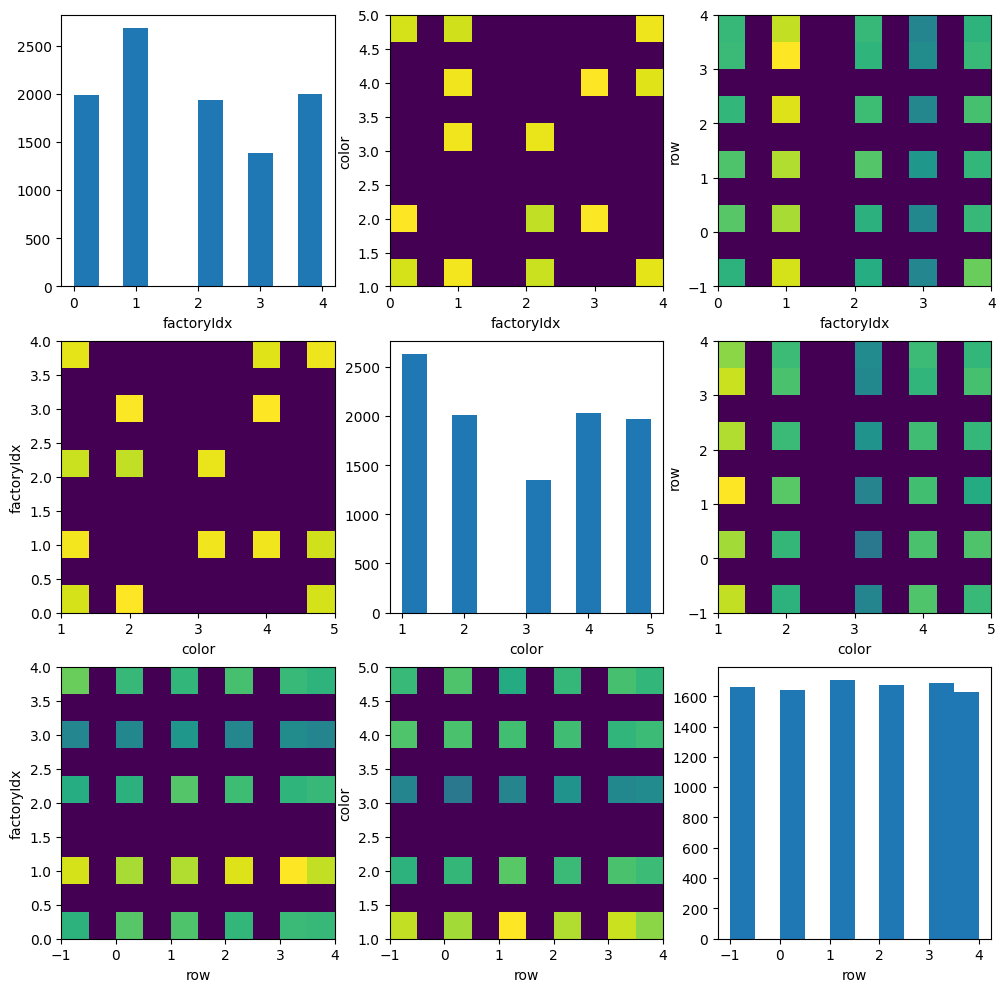

In [40]:
import matplotlib.pyplot as plt 

state = logic.reset_round()

actions = np.array([logic.get_random_action(state) for _ in range(10_000)])
# factoryIdx = [action[0] for action in actions]
# color = [action[1] for action in actions]
# row = [action[2] for action in actions]
lbl = ['factoryIdx', 'color', 'row'] 

plt.figure(figsize=(12,12))
for i in range(3):
    for j in range(3):
        plt.subplot(3,3,i*3+j+1)
        plt.xlabel(lbl[i])
        if i == j:
            plt.hist(actions[:,i])
        else:
            plt.hist2d(actions[:,i], actions[:,j])
            plt.ylabel(lbl[j])

In [43]:
# %timeit actions = np.array([logic.get_random_action(state) for _ in range(1_000)])  # 29.8 - 29 ms, old
%timeit actions = np.array([logic.get_random_action(state) for _ in range(1_000)])  # 3.6 - 9 ms, new

{'factory': [[1, 2, 3, 4], [2, 2, 2, 1], [5, 3, 5, 3], [4, 3, 1, 5], [4, 2, 2, 3], [1, 4, 4, 1], [5, 4, 2, 5]], 'center': [-1], 'player': [{'grid': [[1, 2, 3, 0, 0], [5, 1, 2, 0, 0], [4, 5, 1, 0, 0], [3, 4, 0, 0, 0], [2, 0, 0, 0, 0]], 'line': [[], [], [], [], [4, 4, 4, 4]], 'score': 35, 'floor': []}, {'grid': [[0, 2, 3, 4, 5], [5, 1, 0, 3, 4], [0, 5, 0, 2, 3], [0, 0, 0, 0, 2], [0, 0, 0, 0, 1]], 'line': [[], [], [], [1, 1], [3, 3, 3]], 'score': 34, 'floor': []}, {'grid': [[1, 2, 3, 0, 5], [5, 1, 2, 0, 4], [4, 5, 1, 0, 3], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]], 'line': [[], [], [], [3], [5, 5, 5, 5]], 'score': 27, 'floor': []}], 'activePlayer': 1, 'roundIdx': 4, 'bag': [0, 1, 0, 2, 1], 'discard': [5, 4, 4, 2, 2]}

3.57 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [145]:
# %load_ext snakeviz
# %load_ext autoreload
# %autoreload 2 

import azul.logic as logic
import azul.ai as ai
# state = {'factory': [[1,2,2,3], [5,4,3,3], [1,1,1,2], [4,4,1,2], [2,3,5,1], [1,2,2,2], [1,2,4,5]], 'center': [-1], 
#          'player': [{'grid': [[1, 0, 3, 4, 5], [0, 0, 2, 3, 4], [4, 0, 1, 2, 3], [3, 0, 5, 0, 0], [0, 0, 4, 0, 0]], 'line': [[], [5], [], [1, 1], []], 'score': 43, 'floor': []}, {'grid': [[1, 2, 0, 4, 5], [5, 1, 2, 3, 0], [4, 5, 1, 2, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0]], 'line': [[], [], [], [4], [4, 4, 4, 4]], 'score': 41, 'floor': []}, {'grid': [[1, 2, 3, 4, 0], [5, 1, 2, 3, 0], [0, 0, 0, 2, 3], [0, 0, 0, 0, 2], [0, 0, 0, 0, 0]], 'line': [[], [], [1, 1], [1, 1, 1], [1, 1, 1, 1]], 'score': 21, 'floor': []}], 
#          'activePlayer': 2, 'roundIdx': 3, 'bag': [0, 1,0,0,4], 'discard': [20]*5}
state = {'factory': [[], [], [], [], [], [], []], 'center': [], 
         'player': [{'grid': [[1, 2, 3, 0, 0], [0, 1, 2, 0, 4], [4, 5, 0, 0, 0], [3, 4, 5, 0, 0], [0, 3, 0, 0, 0]], 'line': [[], [], [1, 1], [], [4, 4, 4, 4]], 'score': 31, 'floor': []}, 
                    {'grid': [[1, 2, 3, 4, 0], [5, 1, 2, 3, 0], [4, 5, 0, 2, 3], [0, 0, 0, 0, 0], [2, 0, 0, 0, 1]], 'line': [[], [], [], [5, 5, 5], []], 'score': 38, 'floor': []}, 
                    {'grid': [[1, 2, 3, 4, 0], [5, 1, 2, 3, 0], [4, 5, 1, 0, 0], [3, 0, 0, 0, 0], [2, 0, 0, 0, 0]], 'line': [[], [], [], [4], []], 'score': 49, 'floor': []}], 
        'activePlayer': 0, 'roundIdx': 4, 'bag': [8, 6, 4, 8, 6], 'discard': [2, 5, 6, 0, 4]}

# root = ai.MCTS_node(state)
# root.grow_while(2)
logic.get_reward(logic.deepcopy(state))

[0.15032007143019635, 0.05027288733902294, 0.8003983657822558]

In [158]:
state = {'factory': [[3, 1, 5, 4], [4, 5, 1, 3], [1, 2, 2, 1], [5, 1, 5, 4], [5, 1, 2, 4], [5, 3, 4, 3], [5, 2, 1, 1]], 'center': [-1], 'player': [{'grid': [[1, 2, 3, 0, 0], [0, 1, 2, 0, 4], [4, 5, 0, 0, 0], [3, 4, 5, 0, 0], [0, 3, 0, 0, 0]], 'line': [[], [], [1, 1], [], [4, 4, 4, 4]], 'score': 31, 'floor': []}, {'grid': [[1, 2, 3, 4, 0], [5, 1, 2, 3, 0], [4, 5, 0, 2, 3], [0, 0, 0, 0, 0], [2, 0, 0, 0, 1]], 'line': [[], [], [], [5, 5, 5], []], 'score': 38, 'floor': []}, {'grid': [[1, 2, 3, 4, 0], [5, 1, 2, 3, 0], [4, 5, 1, 0, 0], [3, 0, 0, 0, 0], [2, 0, 0, 0, 0]], 'line': [[], [], [], [4], []], 'score': 49, 'floor': []}], 'activePlayer': 0, 'roundIdx': 4, 'bag': [0, 2, 1, 3, 0], 'discard': [2, 5, 6, 0, 4]}

root = ai.MCTS_node(logic.deepcopy(state))
# root.grow_while(2)

In [161]:
root = ai.MCTS_node(logic.deepcopy(state))

for _ in range(30):
    root.grow_while(3)
    action, idx = root.get_best_action()

    print(f"{root.action[idx]}, {root.child[idx].numWins/root.child[idx].numRolls:.2f}, {root.numRolls}")

[4, 4, 4], 0.53, 408
[4, 4, 4], 0.42, 801
[1, 1, 2], 0.39, 1293
[0, 4, 4], 0.36, 1725
[4, 4, 4], 0.34, 2196
[5, 4, 4], 0.36, 2586
[5, 4, 4], 0.36, 3047
[5, 4, 4], 0.36, 3440
[5, 4, 4], 0.36, 3823
[5, 4, 4], 0.34, 4269
[5, 4, 4], 0.34, 4702
[4, 4, 4], 0.33, 5130
[5, 4, 4], 0.33, 5505
[5, 4, 4], 0.34, 5927


AssertionError: Missing tiles

In [33]:
# %%timeit
from random import choice 
import itertools as it

vals = (i + 3 for i in range(5))
# vals = [i + 3 for i in range(50)]
# choice(vals)
# next(vals)
print(vals)

<generator object <genexpr> at 0x7f1788158040>


In [39]:
seq = it.filterfalse(lambda x: x == 3, range(5))
print(list(seq))

[0, 1, 2, 4]


In [32]:
stateNew = logic.deepcopy(root.state)
logic.play(stateNew, [-1, 1, -1])  # AI, P2
stateNew

{'factory': [[], [], [], [], [], [], []],
 'center': [],
 'player': [{'grid': [[1, 2, 3, 4, 5],
    [0, 1, 2, 3, 4],
    [0, 0, 1, 2, 3],
    [3, 0, 5, 1, 2],
    [0, 0, 4, 0, 1]],
   'line': [[], [], [], [], []],
   'score': 75,
   'floor': []},
  {'grid': [[0, 2, 3, 4, 5],
    [0, 1, 2, 3, 4],
    [4, 0, 1, 2, 0],
    [0, 4, 5, 1, 0],
    [0, 0, 4, 5, 0]],
   'line': [[], [5], [], [], [2, 2, 2, 2]],
   'score': 85,
   'floor': []},
  {'grid': [[0, 2, 3, 4, 5],
    [5, 1, 2, 3, 0],
    [4, 5, 0, 2, 0],
    [0, 0, 5, 0, 0],
    [0, 3, 0, 0, 0]],
   'line': [[], [], [3], [4], []],
   'score': 46,
   'floor': []}],
 'activePlayer': 0,
 'roundIdx': 4,
 'bag': [1, 1, 3, 1, 3],
 'discard': [10, 5, 7, 8, 7]}

In [38]:
root.child[0].state['player'][1]['grid'], logic.score_grid(root.child[0].state['player'][1]['grid'])

[1, 3, 5, 5, 2] [3, 3, 2, 5, 3]


([[0, 2, 3, 4, 5],
  [0, 1, 2, 3, 4],
  [4, 0, 1, 2, 0],
  [0, 4, 5, 1, 0],
  [0, 0, 4, 5, 0]],
 24)

In [8]:
root.child[-2].child[-1].print()

Rolls: 4713, Win ratio: 0.0022, Active player: 0
	Action		UCB	WRatio	NumSims
	[-1, 1, -1]	0.06	0.004	4712


In [10]:
root.child[-2].child[-1].child[0].state

{'factory': [[], [], [], [], [], [], []],
 'center': [],
 'player': [{'grid': [[1, 2, 3, 4, 5],
    [0, 1, 2, 3, 4],
    [0, 0, 1, 2, 3],
    [3, 0, 5, 1, 2],
    [0, 0, 4, 0, 1]],
   'line': [[], [], [], [], []],
   'score': 75,
   'floor': []},
  {'grid': [[0, 2, 3, 4, 5],
    [0, 1, 2, 3, 4],
    [4, 0, 1, 2, 0],
    [0, 4, 5, 1, 0],
    [0, 0, 4, 5, 0]],
   'line': [[], [5], [], [], [2, 2, 2, 2]],
   'score': 85,
   'floor': []},
  {'grid': [[0, 2, 3, 4, 5],
    [5, 1, 2, 3, 0],
    [4, 5, 0, 2, 0],
    [0, 0, 5, 0, 0],
    [0, 3, 0, 0, 0]],
   'line': [[], [], [3], [4], []],
   'score': 46,
   'floor': []}],
 'activePlayer': 0,
 'roundIdx': 4,
 'bag': [1, 1, 3, 1, 3],
 'discard': [10, 5, 7, 8, 7]}

In [14]:
root.child[-2].child[-1].child[0].state

{'factory': [[], [], [], [], [], [], []],
 'center': [],
 'player': [{'grid': [[1, 2, 3, 4, 5],
    [0, 1, 2, 3, 4],
    [0, 0, 1, 2, 3],
    [3, 0, 5, 1, 2],
    [0, 0, 4, 0, 1]],
   'line': [[], [], [], [], []],
   'score': 75,
   'floor': []},
  {'grid': [[0, 2, 3, 4, 5],
    [0, 1, 2, 3, 4],
    [4, 0, 1, 2, 0],
    [0, 4, 5, 1, 0],
    [0, 0, 4, 5, 0]],
   'line': [[], [5], [], [], [2, 2, 2, 2]],
   'score': 85,
   'floor': []},
  {'grid': [[0, 2, 3, 4, 5],
    [5, 1, 2, 3, 0],
    [4, 5, 0, 2, 0],
    [0, 0, 5, 0, 0],
    [0, 3, 0, 0, 0]],
   'line': [[], [], [3], [4], []],
   'score': 46,
   'floor': []}],
 'activePlayer': 0,
 'roundIdx': 4,
 'bag': [1, 1, 3, 1, 3],
 'discard': [10, 5, 7, 8, 7]}

In [92]:
stateNew = logic.deepcopy(root.state)
logic.play(stateNew, [-1, 1, -1])  # AI, P2

logic.print_state(stateNew)

here
it is terminal!
Bag: [0, 1, 0, 2, 1]
Discard: [10, 9, 8, 8, 6]
Factory:
[]
[]
[]
[]
[]
[]
[]
  []
Player 0: 77
 line:  [[], [], [], [], []]
 grid:  [[1, 2, 3, 4, 0], [5, 1, 2, 0, 0], [4, 5, 1, 2, 0], [3, 4, 5, 0, 0], [2, 0, 4, 0, 0]]
 floor:  []
Player 1: 57
 line:  [[], [], [], [], [3, 3, 3]]
 grid:  [[1, 2, 3, 4, 5], [5, 1, 0, 3, 4], [4, 5, 0, 2, 3], [0, 0, 0, 1, 2], [0, 0, 0, 0, 1]]
 floor:  []
Player 2: 57
 line:  [[], [], [], [], [5, 5, 5, 5]]
 grid:  [[1, 2, 3, 4, 5], [5, 1, 2, 3, 4], [4, 5, 1, 2, 3], [3, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []


In [80]:
root.child[0].state

{'factory': [[], [], [], [], [], [], []],
 'center': [],
 'player': [{'grid': [[1, 2, 3, 0, 0],
    [5, 1, 2, 0, 0],
    [4, 5, 1, 0, 0],
    [3, 4, 0, 0, 0],
    [2, 0, 0, 0, 0]],
   'line': [[4], [], [2, 2, 2], [5, 5, 5, 5], [4, 4, 4, 4, 4]],
   'score': 35,
   'floor': [5, 2]},
  {'grid': [[0, 2, 3, 4, 5],
    [5, 1, 0, 3, 4],
    [0, 5, 0, 2, 3],
    [0, 0, 0, 0, 2],
    [0, 0, 0, 0, 1]],
   'line': [[1], [], [4, 4, 4], [1, 1, 1, 1], [3, 3, 3]],
   'score': 34,
   'floor': [-1, 1, 1]},
  {'grid': [[1, 2, 3, 0, 5],
    [5, 1, 2, 0, 4],
    [4, 5, 1, 0, 3],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]],
   'line': [[4], [3, 3], [2, 2, 2], [3, 3, 3, 3], [5, 5, 5, 5]],
   'score': 27,
   'floor': []}],
 'activePlayer': 2,
 'roundIdx': 4,
 'bag': [0, 1, 0, 2, 1],
 'discard': [5, 4, 4, 2, 2]}

In [43]:
root.print()

Rolls: 152660, Win ratio: 0.0, Active player: 0
	Action		UCB	WRatio	NumSims
	[-1, 2, -1]	1.00	0.126	31
	[-1, 2, 3]	1.00	0.126	31
	[-1, 4, -1]	1.00	0.123	31
	[-1, 4, 1]	1.00	0.126	31
	[-1, 4, 4]	1.00	0.138	32
	[-1, 5, -1]	1.00	0.096	29
	[-1, 5, 3]	1.00	0.162	34
	[6, 2, -1]	1.01	0.484	86
	[6, 2, 3]	1.01	0.264	43
	[6, 4, -1]	1.01	0.612	152
	[6, 4, 1]	1.01	0.693	236
	[6, 4, 4]	1.01	0.999	151829
	[6, 5, -1]	1.01	0.263	43
	[6, 5, 3]	1.01	0.332	52


In [45]:
root.child[-3].print()

Rolls: 151829, Win ratio: 1.0, Active player: 1
	Action		UCB	WRatio	NumSims
	[-1, 2, -1]	0.11	0.081	39093
	[-1, 4, -1]	0.11	0.088	76341
	[-1, 5, -1]	0.11	0.080	36394


In [46]:
root.child[11].child[1].print()

Rolls: 76341, Win ratio: 0.088, Active player: 2
	Action		UCB	WRatio	NumSims
	[-1, 2, -1]	0.09	0.056	17417
	[-1, 5, -1]	0.09	0.061	24406
	[-1, 5, 4]	0.09	0.066	34517


In [47]:
root.child[11].child[1].child[2].print()

Rolls: 34517, Win ratio: 0.066, Active player: 0
	Action		UCB	WRatio	NumSims
	[-1, 2, -1]	1.01	0.097	25
	[-1, 2, 3]	1.02	1.000	34491


In [48]:
stateEnd = logic.deepcopy(root.child[11].child[1].child[2].child[1].state)
# logic.get_reward(stateEnd)
logic.print_state(stateEnd)

Bag: [0, 1, 0, 2, 1]
Discard: [10, 7, 7, 9, 10]
Factory:
[]
[]
[]
[]
[]
[]
[]
  []
Player 0: 61
 line:  [[], [], [], [2, 2], []]
 grid:  [[1, 2, 3, 4, 0], [5, 1, 2, 0, 0], [4, 5, 1, 2, 0], [3, 4, 0, 0, 0], [2, 0, 4, 0, 0]]
 floor:  []
Player 1: 57
 line:  [[], [], [], [], [3, 3, 3]]
 grid:  [[0, 2, 3, 4, 5], [5, 1, 2, 3, 4], [0, 5, 1, 2, 3], [0, 0, 0, 1, 2], [0, 0, 0, 0, 1]]
 floor:  []
Player 2: 41
 line:  [[], [], [], [3], []]
 grid:  [[1, 2, 3, 4, 5], [5, 1, 2, 3, 4], [4, 5, 1, 0, 3], [0, 0, 0, 0, 0], [0, 0, 0, 5, 0]]
 floor:  []


In [24]:
logic.get_reward(root.child[11].child[1].child[2].child[0].state)


[1.0, 0.07265625, 0.04453125]

In [21]:
# %%snakeviz -t

root.grow_while(timeout=10)  # 8317 rolls/10 s
print(root.numRolls)
# remove np from score_board: 11238 / 10s 3P
# root.print()

# old random sample: 8689 / 10s 3P - 12647
# new random sample: 4288 / 10s 3P - 7703

1144


In [96]:
# state = {'factory': [[], [], [], [], []], 'center': [], 
#          'player': [{'grid': [[1, 2, 0, 4, 5], [5, 1, 2, 3, 0], [4, 5, 1, 2, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0]], 'line': [[], [], [], [4], [4, 4, 4, 4]], 'score': 41, 'floor': []}, {'grid': [[1, 2, 3, 4, 0], [5, 1, 2, 3, 0], [0, 0, 0, 2, 3], [0, 0, 0, 0, 2], [0, 0, 0, 0, 0]], 'line': [[], [], [1, 1], [1, 1, 1], [1, 1, 1, 1]], 'score': 21, 'floor': [-1]}], 
#          'activePlayer': 2, 'roundIdx': 3, 'bag': [4]*5, 'discard': [20]*5}


state1 = logic.deepcopy(state)
logic.reset_round(state1)

# logic.draw_tiles(4, state1['bag'])
logic.print_state(state1)

Bag: [0, 0, 0, 0, 0]
Discard: [20, 20, 20, 20, 20]
Factory:
[3, 2, 5, 2]
[4, 1, 5, 4]
[5, 5, 4, 1]
[4, 3, 2, 3]
[1, 3, 2, 1]
  []
Player 0: 41
 line:  [[], [], [], [4], [4, 4, 4, 4]]
 grid:  [[1, 2, 0, 4, 5], [5, 1, 2, 3, 0], [4, 5, 1, 2, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []
Player 1: 20
 line:  [[], [], [1, 1], [1, 1, 1], [1, 1, 1, 1]]
 grid:  [[1, 2, 3, 4, 0], [5, 1, 2, 3, 0], [0, 0, 0, 2, 3], [0, 0, 0, 0, 2], [0, 0, 0, 0, 0]]
 floor:  []


In [131]:
tbl = logic.Table()

state = tbl.get_observation()
state = logic.reset_round(state)

logic.print_state(state)

Bag: [13, 14, 16, 14, 15]
Discard: [0, 0, 0, 0, 0]
Factory:
[3, 4, 4, 4]
[3, 1, 1, 5]
[1, 2, 5, 2]
[5, 2, 5, 3]
[1, 4, 2, 4]
[2, 1, 5, 1]
[3, 2, 4, 1]
  [-1]
Player 0: 0
 line:  [[], [], [], [], []]
 grid:  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []
Player 1: 0
 line:  [[], [], [], [], []]
 grid:  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []
Player 2: 0
 line:  [[], [], [], [], []]
 grid:  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []


In [2]:
import azul.ai as ai 
import azul.logic as logic

# state = {'factory': [[], [], [], [], [], [], []], 'center': [], 
#          'player': [{'grid': [[1, 0, 3, 4, 5], [0, 0, 2, 3, 4], [4, 0, 1, 2, 3], [3, 0, 5, 0, 0], [0, 0, 4, 0, 0]], 'line': [[], [5], [], [1, 1], []], 'score': 43, 'floor': []}, {'grid': [[1, 2, 0, 4, 5], [5, 1, 2, 3, 0], [4, 5, 1, 2, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0]], 'line': [[], [], [], [4], [4, 4, 4, 4]], 'score': 41, 'floor': []}, {'grid': [[1, 2, 3, 4, 0], [5, 1, 2, 3, 0], [0, 0, 0, 2, 3], [0, 0, 0, 0, 2], [0, 0, 0, 0, 0]], 'line': [[], [], [1, 1], [1, 1, 1], [1, 1, 1, 1]], 'score': 21, 'floor': []}], 
#          'activePlayer': 2, 'roundIdx': 3, 'bag': [0, 1,0,0,4], 'discard': [20]*5}

state = logic.reset_round()
# state = logic.reset_round(state)
root = ai.MCTS_node(state)
# root.rollout()
root.grow_while(10)

root.print()
# 17374 nsims new version , 1493 
# 25175 old version, 27978

self.numRolls=1580, self.numWins=0, self.state['activePlayer']=0
	Action		UCB	WRatio	NumSims
	[0, 2, -1]	1.46	0.473	15
	[0, 2, 0]	1.45	0.488	16
	[0, 2, 1]	1.46	0.436	14
	[0, 2, 2]	1.48	0.457	14
	[0, 2, 3]	1.46	0.400	13
	[0, 2, 4]	1.45	0.488	16
	[0, 3, -1]	1.45	0.460	15
	[0, 3, 0]	1.47	0.512	16
	[0, 3, 1]	1.47	0.480	15
	[0, 3, 2]	1.47	0.506	16
	[0, 3, 3]	1.47	0.567	18
	[0, 3, 4]	1.47	0.480	15
	[0, 5, -1]	1.43	0.440	15
	[0, 5, 0]	1.46	0.436	14
	[0, 5, 1]	1.46	0.529	17
	[0, 5, 2]	1.45	0.429	14
	[0, 5, 3]	1.48	0.595	19
	[0, 5, 4]	1.48	0.457	14
	[1, 1, -1]	1.46	0.529	17
	[1, 1, 0]	1.45	0.385	13
	[1, 1, 1]	1.47	0.567	18
	[1, 1, 2]	1.47	0.567	18
	[1, 1, 3]	1.47	0.513	16
	[1, 1, 4]	1.45	0.421	14
	[1, 2, -1]	1.43	0.475	16
	[1, 2, 0]	1.46	0.300	11
	[1, 2, 1]	1.44	0.506	17
	[1, 2, 2]	1.47	0.541	17
	[1, 2, 3]	1.46	0.556	18
	[1, 2, 4]	1.47	0.480	15
	[1, 4, -1]	1.46	0.584	19
	[1, 4, 0]	1.43	0.475	16
	[1, 4, 1]	1.45	0.518	17
	[1, 4, 2]	1.45	0.487	16
	[1, 4, 3]	1.47	0.443	14
	[1, 4, 4]	1.47	0.506	16
	

In [9]:
%load_ext snakeviz
%snakeviz -t

state = logic.reset_round()
# state = logic.reset_round(state)
root = ai.MCTS_node(state)
# root.rollout()
root.grow_while(1)

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz
 
*** Profile stats marshalled to file '/tmp/tmpp7vwwajg'.
Opening SnakeViz in a new tab...
snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2Ftmp%2Ftmpp7vwwajg
Opening in existing browser session.


MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0



In [124]:
state = logic.reset_round()
state['grid'] = (np.array([
    [0, 2, 0, 0],
    [0, 1, 3, 3],
    [1, 2, 2, 3],
    [1, 0, 0, 1]
]) -1).tolist()
state['activePlayer'] = 2 - 1

root = ai.MCTS_node(state)
root.grow(timeout=5)

logic.print_state(state)
# logic.get_reward(state)
# logic.is_terminal(state)
# ai.maxn(state, 8, -100)
root.print()
root.get_best_action()

activePlayer=1	numPlayers=3	startingPlayer=0	roundIdx=0
   | 1 |   |  
---+---+---+---
   | 0 | 2 | 2
---+---+---+---
 0 | 1 | 1 | 2
---+---+---+---
 0 |   |   | 0
self.numRolls=82629, self.numWins=0, self.state['activePlayer']=1
	Action		UCB	WRatio	NumSims
	[0, 0]	0.23	0.172	6725
	[0, 2]	0.23	0.175	7541
	[0, 3]	0.23	0.208	47772
	[1, 0]	0.23	0.174	7336
	[3, 1]	0.23	0.171	6531
	[3, 2]	0.23	0.172	6724


([0, 3], 2)

In [4]:
# Simulate a full game
import azul.ai as ai
from random import seed 
import azul.logic as logic
from copy import deepcopy
# seed(1)

t = logic.Table()
state = t.get_observation()

agents = [
    lambda state: ai.get_random_action(state),
    # lambda state: ai.alphabeta(state, 1, 4, -np.Inf, np.Inf, state['activePlayer'])[1],
    # lambda state: ai.negamax(state, 1, 4, state['activePlayer'])[1],
    lambda state: ai.get_random_action(state),
]

info = []
while not (t.is_round_over() and t.is_game_over()):
    state = deepcopy(t.get_observation())
    action = agents[state['activePlayer']](state)
    
    factoryIdx, color, row = action
    assert t.is_valid(color, factoryIdx, row), "Invalid action"
    info.append({'state': deepcopy(state), 'action': action})
    t.step_move(color, factoryIdx, row)

# ai.get_reward(state), state
# ai.get_reward(t.get_observation()), t.get_observation()
state

{'factory': [[], [], [], [], []],
 'center': [5],
 'player': [{'grid': [[1, 0, 3, 4, 5],
    [0, 1, 2, 0, 4],
    [4, 0, 0, 0, 0],
    [0, 4, 5, 0, 0],
    [2, 0, 0, 0, 1]],
   'line': [[2], [3, 3], [2, 2], [], [4]],
   'score': 0,
   'floor': [-1, 1, 4, 4, 3]},
  {'grid': [[1, 0, 3, 4, 5],
    [5, 0, 0, 3, 4],
    [4, 5, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [2, 0, 0, 0, 0]],
   'line': [[2], [], [1], [4, 4, 4], [1, 1]],
   'score': 0,
   'floor': [5, 5, 5, 5, 5, 2, 1, 1]}],
 'activePlayer': 1,
 'roundIdx': 7}

In [122]:
# %load_ext snakeviz
# %load_ext autoreload
# %autoreload 2
import azul.ai as ai
from random import seed 
import azul.logic as logic
from azul.logic import deepcopy
# from copy import deepcopy

state = logic.reset_round(numPlayers=3)
root = ai.MCTS_node(deepcopy(state))
# root.grow_while(timeout=10)

logic.print_state(state)
result = []
for i in range(10):
    root.grow_while(timeout=10)
    action, actionIdx = root.get_best_action()

    result.append({
        'avgRatio': root.child[actionIdx].numWins / root.child[actionIdx].numRolls,
        'numRolls': root.child[actionIdx].numRolls,
        'UCB': root.child[actionIdx].eval(),
        'action': action.copy()})
# root.numRolls # root.print()

Factory:
[5, 5, 2, 2]
[3, 4, 1, 1]
[1, 1, 5, 1]
[4, 3, 5, 2]
[1, 2, 4, 2]
[4, 2, 2, 4]
[4, 5, 5, 2]
  [-1]
Player 0: 0
 line:  [[], [], [], [], []]
 grid:  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []
Player 1: 0
 line:  [[], [], [], [], []]
 grid:  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []
Player 2: 0
 line:  [[], [], [], [], []]
 grid:  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
 floor:  []


In [105]:
numPlayer = 4
numFactory = logic.NUM_FACTORY_VS_PLAYER[numPlayer]
actionSpace = np.zeros([
    numPlayer, numFactory, logic.NUM_COLORS, logic.NUM_LINES], 
    dtype=bool)

colors = np.arange(logic.NUM_COLORS) + 1

# a player pick a factory
activePlayer, factoryIdx, color, line = 0, 1, 3, 2
otherColors = state['factory'][factoryIdx].remove(color)
actionSpace[:,factoryIdx,color,:] = False 
actionSpace[activePlayer,:,colors!=color,line] = False


{'factory': [[2, 3, 2, 5],
  [4, 3, 5, 5],
  [1, 2, 3, 1],
  [1, 5, 4, 4],
  [1, 5, 2, 1],
  [5, 5, 4, 1],
  [4, 5, 1, 4]],
 'center': [-1],
 'player': [{'grid': [[0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]],
   'line': [[], [], [], [], []],
   'score': 0,
   'floor': []},
  {'grid': [[0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]],
   'line': [[], [], [], [], []],
   'score': 0,
   'floor': []},
  {'grid': [[0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]],
   'line': [[], [], [], [], []],
   'score': 0,
   'floor': []}],
 'activePlayer': 0,
 'roundIdx': 0}

In [20]:
from random import choices 

choices(range(3), [1,0,2], k=1)

[2]

In [22]:
%%snakeviz -t
root.grow_while(timeout=10)  # 8317 rolls/10 s
# remove np from score_board: 11238 / 10s 3P
# root.print()

 
*** Profile stats marshalled to file '/tmp/tmpw7dhtxxu'.
Opening SnakeViz in a new tab...
snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2Ftmp%2Ftmpw7dhtxxu


MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0



Opening in existing browser session.


In [28]:
%load_ext autoreload
%autoreload 2
import numpy as np

# njit 3.19 us
# np 66.5 us
# native  3.6 us
# grid = np.array(state['player'][1]['grid'])
grid = [
    [1, 2, 3, 4, 5],
    [5, 1, 0, 3, 4],
    [0, 5, 1, 2, 3],
    [3, 0, 0, 1, 0],
    [2, 0, 0, 5, 1]]
%timeit logic.score_board(grid)
# logic.score_board(grid)

# %timeit logic.score_board(state['player'][0]['grid']) 
# logic.score_board(np.array(state['player'][0]['grid'])) 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
4.88 µs ± 119 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
# from azul.ai import get_reward_simple, get_reward, negamax, alphabeta
import azul.ai as ai
from copy import deepcopy

# t = logic.Table()
# obs = t.get_observation()
obs = logic.reset_round()

# ai.negamax(obs, 1, 4, obs['activePlayer']), \
# ai.alphabeta(obs, 1, 4, -np.Inf, np.Inf, obs['activePlayer'])
# ai.alphabeta(obs, 1, 4, -np.Inf, np.Inf, obs['activePlayer'])

# ai.get_reward_simple(obs)
rewards = []
actions = logic.get_action_space(obs)
for action in actions:
    state = deepcopy(obs)
    logic.play(state, action)
    rewards.append(logic.get_reward_simple(state))

# ai.negamax(deepcopy(obs), 1, 2, obs['activePlayer']), \
ai.alphabeta(deepcopy(obs), 1, 2, -np.Inf, np.Inf, obs['activePlayer']), \
    actions, rewards

# ai.is_terminal(obs)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [96]:
# Simulate a full game
state = ai.reset_round()

agents = [
    # lambda state: ai.get_random_action(state),
    lambda state: ai.alphabeta(state, 1, 3, -np.Inf, np.Inf, state['activePlayer'])[1],
    lambda state: ai.get_random_action(state),
]

while not ai.is_game_over(state):
    while not ai.is_terminal(state):
        action = agents[state['activePlayer']](state)
        assert ai.is_valid_action(state, action), "Invalid action"
        ai.play(state, action)

    ai.reset_round(state)

ai.get_reward(state), state

([0, 8],
 {'factory': [[], [], [], [], []],
  'center': [],
  'player': [{'grid': [[0, 0, 3, 0, 0],
     [0, 0, 0, 0, 4],
     [0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0]],
    'line': [[], [], [], [], []],
    'score': 0,
    'floor': []},
   {'grid': [[1, 2, 3, 4, 5],
     [5, 0, 2, 0, 4],
     [0, 0, 0, 0, 0],
     [3, 4, 5, 0, 0],
     [0, 0, 0, 0, 0]],
    'line': [[], [], [1, 1], [], [2, 2]],
    'score': 8,
    'floor': []}],
  'activePlayer': 1,
  'roundIdx': 5})

In [72]:
state['player'][1]

{'grid': [[1, 2, 3, 4, 5],
  [5, 0, 0, 0, 0],
  [0, 5, 0, 2, 0],
  [0, 0, 0, 0, 2],
  [0, 0, 0, 0, 0]],
 'line': [[], [3], [4, 4], [], [4, 4, 4]],
 'score': 2,
 'floor': [3,
  2,
  5,
  5,
  1,
  3,
  2,
  2,
  2,
  3,
  1,
  1,
  1,
  1,
  1,
  5,
  5,
  5,
  5,
  1,
  1,
  1,
  1,
  3,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  5,
  5]}

In [67]:
np.array([[]] * 5).tolist()

[[], [], [], [], []]

In [38]:
t = logic.Table()
obs = t.get_observation()

ai.negamax(deepcopy(obs), 1, 2, obs['activePlayer'])  # 4.6s
# ai.alphabeta(deepcopy(obs), 1, 3, -np.Inf, np.Inf, obs['activePlayer'])

(1, [4, 1, 2])

In [40]:
from azul.ai import get_heuristics
from copy import deepcopy

t = azul.Table()
rewards = []
for reps in range(1):
    obs = t.get_observation()

    obs['player'][0]['line'][4] = [1]

    obs['player'][0]['grid'] = [
        [0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 5, 0, 0],
        [0, 0, 4, 0, 0]]

    obs['player'][1]['grid'] = [
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]

    obs['player'][2]['grid'] = [
        [0, 0, 3, 0, 0],
        [0, 0, 2, 0, 0],
        [0, 5, 0, 0, 0],
        [0, 0, 5, 0, 0],
        [0, 0, 0, 0, 0]]
    
    rewards.append(get_heuristics(obs))

# get_heuristics(obs), obs['player']
# min([min([g.count(0) for g in p['grid']]) for p in obs['player']])
obs['player']
# np.mean(rewards, axis=0), np.std(rewards, axis=0)


ImportError: cannot import name 'get_heuristics' from 'azul.ai' (/home/garamizo/Azul-Board-Game/azul/ai.py)

In [ ]:
# %%timeit 
from azul.ai import get_random_action, get_action_space, play, is_terminal, get_reward, MCTS_node, get_winner
from azul.logic import random_move 

t = azul.Table()
obs = t.get_observation()
obsOld = deepcopy(obs)

root = MCTS_node(obsOld)
MCTS_node.grow(root, timeout=1.0)

# action = get_random_action(obs)  # 35 us
action, _ = MCTS_node.get_best_action(root)

play(obs, action)

# random_move(obs)  # 19.9 us
# get_action_space(obs)
# play(obs, action)
# action, obs
# get_reward(obs)
# len(root.action)
# root.rollout()

# root.print()
rootNew = MCTS_node.search_node(root, obs)
# obs, obsOld
rootNew.print()
root.print()

self.numRolls=26, self.numWins=18, self.state['activePlayer']=1
	Action		UCB	WRatio	NumSims
	[-1, 3, -1]	2.55	0.000	1
	[-1, 3, 0]	3.55	1.000	1
	[-1, 3, 4]	3.55	1.000	1
	[-1, 4, 3]	2.55	0.000	1
	[0, 4, 1]	2.55	0.000	1
	[0, 4, 2]	2.55	0.000	1
	[0, 4, 4]	3.55	1.000	1
	[0, 5, 2]	2.55	0.000	1
	[0, 5, 4]	2.55	0.000	1
	[1, 1, 0]	2.55	0.000	1
	[1, 1, 3]	2.55	0.000	1
	[1, 2, -1]	2.55	0.000	1
	[1, 2, 0]	2.55	0.000	1
	[1, 2, 1]	2.55	0.000	1
	[1, 5, -1]	3.55	1.000	1
	[2, 3, 4]	3.55	1.000	1
	[2, 4, 1]	2.55	0.000	1
	[2, 4, 2]	2.55	0.000	1
	[2, 4, 4]	2.55	0.000	1
	[3, 2, 2]	3.55	1.000	1
	[3, 4, 3]	2.55	0.000	1
	[3, 4, 4]	2.55	0.000	1
	[3, 5, 0]	3.55	1.000	1
	[3, 5, 1]	2.55	0.000	1
	[3, 5, 2]	3.55	1.000	1
self.numRolls=1468, self.numWins=0, self.state['activePlayer']=0
	Action		UCB	WRatio	NumSims
	[0, 3, -1]	1.41	0.200	10
	[0, 3, 0]	1.44	0.680	25
	[0, 3, 1]	1.39	0.438	16
	[0, 3, 2]	1.40	0.526	19
	[0, 3, 3]	1.40	0.471	17
	[0, 3, 4]	1.40	0.640	25
	[0, 4, -1]	1.44	0.333	12
	[0, 4, 0]	1.40	0.550	20
	[0, 4

In [ ]:
# == takes 80.2 ns
actions = {'a':[1, 1, 2], 'b':[2, 1, 1], 'c':[3, 2, 1]}
actions2 = {'a':[1, 1, 2], 'b':[2, 1, 1]}
actions2['c'] = [3, 2, 1]

# == takes 64 ns
# actions = [[1, 1, 2], [2, 1, 1], [3, 2, 1]]
# actions2 = [[1, 1, 2], [2, 1, 1]]
# actions2.append([3, 2, 1])
# b = [1, 2]

child = {str(a): None for a in actions}

actions == actions2
# actions, actions2
# b == None
str(actions)

"{'a': [1, 1, 2], 'b': [2, 1, 1], 'c': [3, 2, 1]}"

In [ ]:
%load_ext autoreload
%autoreload 2

from azul.ai import MCTS_node, get_random_action
from azul.logic import random_move, Table

t = Table()
obs = t.get_observation()

root = MCTS_node(obs, 0)
root.grow()

root.print()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
self.numRolls=2638, self.numWins=0, self.state['activePlayer']=0
	Action		UCB	WRatio	NumSims
	[0, 1, -1]	1.24	0.462	26
	[0, 1, 0]	1.23	0.417	24
	[0, 1, 1]	1.22	0.500	30
	[0, 1, 2]	1.23	0.440	25
	[0, 1, 3]	1.23	0.440	25
	[0, 1, 4]	1.23	0.440	25
	[0, 2, -1]	1.25	0.500	28
	[0, 2, 0]	1.25	0.481	27
	[0, 2, 1]	1.24	0.350	20
	[0, 2, 2]	1.24	0.545	33
	[0, 2, 3]	1.24	0.462	26
	[0, 2, 4]	1.24	0.462	26
	[0, 3, -1]	1.24	0.559	34
	[0, 3, 0]	1.25	0.481	27
	[0, 3, 1]	1.24	0.571	35
	[0, 3, 2]	1.24	0.462	26
	[0, 3, 3]	1.23	0.440	25
	[0, 3, 4]	1.25	0.500	28
	[0, 5, -1]	1.25	0.595	37
	[0, 5, 0]	1.23	0.440	25
	[0, 5, 1]	1.23	0.440	25
	[0, 5, 2]	1.22	0.391	23
	[0, 5, 3]	1.22	0.391	23
	[0, 5, 4]	1.25	0.500	28
	[1, 3, -1]	1.24	0.583	36
	[1, 3, 0]	1.23	0.516	31
	[1, 3, 1]	1.25	0.481	27
	[1, 3, 2]	1.23	0.531	32
	[1, 3, 3]	1.23	0.440	25
	[1, 3, 4]	1.24	0.571	35
	[1, 4, -1]	1.25	0.381	21
	[1, 4, 0]	1.25	0.381	21
	[1, 4, 1]	1.

In [ ]:
a = 1 
b = None

if a is not None:
    print('not none')

if a is None or b is None:
    print('none')

not none
none


In [ ]:
grid = np.array([
    [0, 2, 3, 4, 5],
    [5, 1, 2, 3, 4],
    [4, 5, 1, 2, 3],
    [3, 4, 5, 1, 2],
    [2, 3, 4, 5, 1]])
np.sum(grid == 1)

discard = [1, 2, 2, 1, 2, 4]
# if discard.count(-1) > 0:
#     discard.remove(-1)
# np.random.permutation(discard)
# discard.remove(1)
discard.clear()
discard

[]

In [ ]:
np.random.seed(100)
t = azul.Table()

# t.player[0].grid = np.array([
#     [1, 2, 3, 4, 5],
#     [0, 1, 0, 3, 4],
#     [4, 0, 1, 0, 3],
#     [0, 4, 0, 0, 2],
#     [0, 3, 4, 0, 0]])

# t.step_move(mark=5, factoryIdx=0, playerIdx=0, row=1)
# t.step_move(mark=5, factoryIdx=6, playerIdx=0, row=2)
# t.step_move(mark=1, factoryIdx=-1, playerIdx=0, row=4)
# t.print()
# t.player[0].print()
obs = t.get_observation()

# mark, factoryIdx, row = azul.random_move(0, obs)
# mark, factoryIdx, row
playerPolicyFcn = [azul.random_move] * 3
t.step_round(playerPolicyFcn)
# mark, factoryIdx, row = playerPolicyFcn[0](
#     0, obs)
# len(obs['factory'])
t.print()

[]
[]
[]
[]
[]
  []
[[], [3], [2], [], [4, 4, 4]]
[[1. 2. 3. 4. 5.]
 [5. 0. 2. 0. 4.]
 [4. 5. 0. 0. 0.]
 [3. 4. 0. 1. 0.]
 [2. 0. 0. 0. 0.]]
[]
8
---
[[], [3], [4], [2, 2], []]
[[1. 2. 3. 4. 5.]
 [5. 1. 2. 0. 4.]
 [0. 5. 1. 2. 3.]
 [3. 0. 0. 0. 0.]
 [0. 3. 0. 5. 0.]]
[]
31
---




In [ ]:
t.print()
t.player[0].print()
t.player[1].print()

obs = t.get_observation()
azul.valid_move(obs,playerIdx=0, factoryIdx=-1, mark=5, row=1)

[]
[]
[]
[]
[]
  [1, 1, 1]
---
[[3], [3], [5], [4, 4, 4], [5, 5]]
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0.]]
[-1, 3, 3, 3]
4
---
[[5], [5], [2, 2, 2], [5, 5, 5], [4, 4, 4, 4, 4]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[5, 5]
0
---


False